In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
accident_safety_data=pd.read_csv("C:/Applications/Machine Learning/NLP/CapstoneProjectNLP/data/hse_data.csv")

In [164]:
accident_safety_data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [165]:
accident_safety_data.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

We can see that the columns "Unnamed" is unwanted, as it will not help us in our analysis. 
Also, Data column should be renamed to "Date". Therefore, let's drop the column "Unnamed" and rename the column "Data" to "Date"

In [166]:
#create a backup of the dataset before we make any changes to it
accident_safety_data_new=accident_safety_data
accident_safety_data_new.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [167]:
#dropping "Unnamed" column
accident_safety_data_new.drop('Unnamed: 0',axis='columns', inplace=True)
#renaming "Data" column to "Date"
accident_safety_data_new.rename(columns = {'Data':'Date'}, inplace = True)

In [168]:
#Let us check the shape of our dataset
accident_safety_data_new.shape

(425, 10)

We can see that the dataset has 425 rows and 10 columns

In [169]:
accident_safety_data_new.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [170]:
#Let us check for missing values in the dataset
accident_safety_data_new.isna().apply(pd.value_counts)

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
False,425,425,425,425,425,425,425,425,425,425


We can see that this dataset has no null values.

In [171]:
#Let us now check the datatype of the dataset and also get to know some more details
accident_safety_data_new.dtypes

Date                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

Here, we can see that all the columns of the dataset are of "object" datatype. Coming to the type of data present in each column, we can see that there is a column "Date", which means it holds time series data. All other columns except "Description" are of categorical datatype. 

In [172]:
accident_safety_data_new.describe().T

,count,unique,top,freq
Date,425,287,2017-02-08 00:00:00,6
Countries,425,3,Country_01,251
Local,425,12,Local_03,90
Industry Sector,425,3,Mining,241
Accident Level,425,5,I,316
Potential Accident Level,425,6,IV,143
Genre,425,2,Male,403
Employee or Third Party,425,3,Third Party,189
Critical Risk,425,33,Others,232
Description,425,411,During the activity of chuteo of ore in hopper...,3


From the above table, we can infer the below:

1. This dataset contains accident data of 3 countries, out of which Country1 has the most number of accidents. 

2. The data is collected from 3 types of industry sectors.Local_3 has the most number of accidents.

3. There are 5 major accident levels in which this dataset has been classified.316 accidents are of accident level 1, making it the most frequent accident type. This also means that the data is not distributed evenly.

4. The data is a consolidation of accidents faced by employees as well as third party vendors and others. Third party employees have faced the most number of accidents according to this dataset.

5. 403 male employees have been reported to have accidents, which mean the distribution of data in this case is also not evenly balanced.

6. 33 different types of critical risks have been identified in the dataset.

We have seen that there are quite a few categorical columns in the dataset which can be encoded to numerical values e.g. 

1. Local

2. Accident Level

3. Potential Accident Level


In [173]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
#accident_safety_data_new['Countries'] = lb_make.fit_transform(accident_safety_data_new['Countries'])
#accident_safety_data_new['Local'] = lb_make.fit_transform(accident_safety_data_new['Local'])
accident_safety_data_new['Accident Level'] = lb_make.fit_transform(accident_safety_data_new['Accident Level'])
accident_safety_data_new['Potential Accident Level'] = lb_make.fit_transform(accident_safety_data_new['Potential Accident Level'])
#accident_safety_data_new['Genre'] = lb_make.fit_transform(accident_safety_data_new['Genre'])


In [174]:
accident_safety_data_new.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,0,3,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,0,3,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,0,2,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,3,3,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


UNIVARIATE ANALYSIS

1. Let us check the distribution of data based on country.

In [175]:
import plotly.express as px
fig = px.histogram(accident_safety_data_new, x="Countries")
fig.show()

We can see that "Country_01" has the most number of accident cases.

Let us now see the distribution of accidents with respect to the type of employee.(Employee/ThirdParty/ThirdPartyRemote)

In [176]:
fig = px.histogram(accident_safety_data_new, x="Employee or Third Party")
fig.show()

From the graph it is very clear that accidents have happened in almost equal proportions among permanent employees or third party contractors, with thrid party contractors a bit on the higher side.

Let us also check the distribution of accidents as per industry sector.

In [177]:
fig = px.histogram(accident_safety_data_new, x="Industry Sector")
fig.show()

We can see that majority of accidents have happened in the mining sector, followed by metal industry and other type of industries.

We will now see the distribution of accidents as per Gender

In [178]:
fig = px.histogram(accident_safety_data_new, x="Genre")
fig.show()

Clearly, the distribution of accidents is imbalanced when checked by "Genre". The count of accidents in males is way higher than that in females.

Lastly, let us check the distribution by Locals.

In [179]:
fig = px.histogram(accident_safety_data_new, x="Local")
fig.show()

In [180]:
fig = px.histogram(accident_safety_data_new, x="Accident Level")
fig.show()

We can see that most of the people have met with accident having level 1.

In [181]:
fig = px.histogram(accident_safety_data_new, x="Critical Risk")
fig.show()

We can see from the graph that the Critical risk category "Others" have the most number of accidents. This means we are not clear about the exact risk factor associated with accidents in this dataset.

BIVARIATE ANALYSIS

Let us write a function to see how does the accident level varies with the Industry Sector and Countries

In [182]:
def compareAccidentLevels(data,column_name_x,column_name_y,column_name_color,marginal_value):
    fig = px.histogram(data, x=column_name_x, y=column_name_y, color=column_name_color, 
                   marginal=marginal_value
                  )
    fig.show()

1. We will see how many accidents have occured in which Industry Sector per country

In [183]:
compareAccidentLevels(accident_safety_data_new,"Industry Sector","Accident Level","Countries","box")

The most number of accidents have occured in the Mining Industry in Country 1 so far, followed by the metal industry, also in Country 1.

2. Next, let us see how many accidents have occured in which Industry Sector per Local

In [184]:
compareAccidentLevels(accident_safety_data_new,"Local","Accident Level","Industry Sector","box")

1. Local 01,Local 02,Local 03,Local 04,Local 07 all have plants belonging  to the Mining Sector and they have had the most number of accidents. 
2. Other industry sectors have had the least number of accidents.
3. Local 09 seems to be the safest city, with only 2 accidents, even though it has plants belonging to the Metal sector.

In [185]:
compareAccidentLevels(accident_safety_data_new,"Local","Accident Level","Critical Risk","rug")

1. Local 04 and Local_03 have the highest number of unknown risks i.e. of type "Other".
2. We can see that Local 06 has various kind of risks present, which means it could have more of metal plants there.
3. We can also see that the next critical risks apart from Other are "Power Lock","Fall/Fall Prevention" and "Vehicle and mobile equipment".

In [186]:
compareAccidentLevels(accident_safety_data_new,"Industry Sector","Accident Level","Critical Risk","box")

1. Here it is pretty clear, that the metal industry has many different kind of risks involved when compared to Mining or the other industry.

In [187]:
compareAccidentLevels(accident_safety_data_new,"Industry Sector","Accident Level","Employee or Third Party","violin")

Here it is clearly visible that in the mining industry, third party employees have met with the maximum number of accidents as compared to the metal industry where their employees have met with the highest number of accidents.

In [188]:
compareAccidentLevels(accident_safety_data_new,"Potential Accident Level","Accident Level","Industry Sector","violin")

1. Major number of accidents have occured in the Potential Accident Level 3 category.
2. Potential Accident Level 5 is least in the mining industry.

DATA PREPROCESSING


Let us first take a look at the Description column

In [189]:
accident_safety_data_new.Description[11]

"While preparing the rice for the lunch of the day, when moving the pot # 60 - 35 Kg of weight including the contents - to evacuate the residual water of the cooking of the rice, when positioning the pot on a jaba it tilts backwards spilling some 200 ml of hot water on the cook's leg. The cook immediately after the event applies first aid, pouring cold water on the area of \u200b\u200bthe injury and go to the medical post for evaluation."

We can see that the description column has a lot of special characters, numbers and words in foreign languages also.
Let us fix the spelling mistakes first

In [190]:
#Let us club the columns into Description and Labels
accident_safety_clean_data=accident_safety_data_new
accident_safety_clean_data['labels']=accident_safety_data_new.apply(lambda col: [col['Countries'],col['Local'],str(col['Accident Level']),col['Employee or Third Party']], axis=1)

In [191]:
accident_safety_clean_data=accident_safety_clean_data[['Description','labels','Critical Risk']]

In [192]:
accident_safety_clean_data.head()

,Description,labels,Critical Risk
0,While removing the drill rod of the Jumbo 08 f...,"[Country_01, Local_01, 0, Third Party]",Pressed
1,During the activation of a sodium sulphide pum...,"[Country_02, Local_02, 0, Employee]",Pressurized Systems
2,In the sub-station MILPO located at level +170...,"[Country_01, Local_03, 0, Third Party (Remote)]",Manual Tools
3,Being 9:45 am. approximately in the Nv. 1880 C...,"[Country_01, Local_04, 0, Third Party]",Others
4,Approximately at 11:45 a.m. in circumstances t...,"[Country_01, Local_04, 3, Third Party]",Others


Preprocess values of text column

->Remove unwanted characters

->Convert text to lowercase

->Remove unwanted spaces

->Remove stopwords

In [193]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Soumita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [194]:
accident_safety_clean_data.Description[8]

'Employee was sitting in the resting area at level 326 (raise bore), when he suffered sudden illness, falling and suffering excoriation on the face.'

In [195]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [196]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [197]:
accident_safety_clean_data["clean_text"] = accident_safety_clean_data["Description"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
accident_safety_clean_data.head()

ipykernel_launcher:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Description,labels,Critical Risk,clean_text
0,While removing the drill rod of the Jumbo 08 f...,"[Country_01, Local_01, 0, Third Party]",Pressed,removing drill rod jumbo 08 maintenance superv...
1,During the activation of a sodium sulphide pum...,"[Country_02, Local_02, 0, Employee]",Pressurized Systems,activation sodium sulphide pump piping uncoupl...
2,In the sub-station MILPO located at level +170...,"[Country_01, Local_03, 0, Third Party (Remote)]",Manual Tools,substation milpo located level 170 collaborato...
3,Being 9:45 am. approximately in the Nv. 1880 C...,"[Country_01, Local_04, 0, Third Party]",Others,945 approximately nv 1880 cx695 ob7 personnel ...
4,Approximately at 11:45 a.m. in circumstances t...,"[Country_01, Local_04, 3, Third Party]",Others,approximately 1145 circumstance mechanic antho...


In [198]:
accident_safety_clean_data.shape

(425, 4)

Let us perform some length analysis

In [199]:
accident_safety_clean_data['word_count'] = accident_safety_clean_data["Description"].apply(lambda x: len(str(x).split(" ")))
accident_safety_clean_data['char_count'] = accident_safety_clean_data["Description"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
accident_safety_clean_data['sentence_count'] = accident_safety_clean_data["Description"].apply(lambda x: len(str(x).split(".")))
accident_safety_clean_data['avg_word_length'] = accident_safety_clean_data['char_count'] / accident_safety_clean_data['word_count']
accident_safety_clean_data['avg_sentence_lenght'] = accident_safety_clean_data['word_count'] / accident_safety_clean_data['sentence_count']
accident_safety_clean_data.head()

ipykernel_launcher:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

ipykernel_launcher:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

ipykernel_launcher:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

ipykernel_launcher:4: SettingWithCopyWarning:


A value is tryin

,Description,labels,Critical Risk,clean_text,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
0,While removing the drill rod of the Jumbo 08 f...,"[Country_01, Local_01, 0, Third Party]",Pressed,removing drill rod jumbo 08 maintenance superv...,80,378,2,4.725000,40.000000
1,During the activation of a sodium sulphide pum...,"[Country_02, Local_02, 0, Employee]",Pressurized Systems,activation sodium sulphide pump piping uncoupl...,54,254,4,4.703704,13.500000
2,In the sub-station MILPO located at level +170...,"[Country_01, Local_03, 0, Third Party (Remote)]",Manual Tools,substation milpo located level 170 collaborato...,57,258,2,4.526316,28.500000
3,Being 9:45 am. approximately in the Nv. 1880 C...,"[Country_01, Local_04, 0, Third Party]",Others,945 approximately nv 1880 cx695 ob7 personnel ...,97,466,5,4.804124,19.400000
4,Approximately at 11:45 a.m. in circumstances t...,"[Country_01, Local_04, 3, Third Party]",Others,approximately 1145 circumstance mechanic antho...,88,400,6,4.545455,14.666667


Let us check the word count as per the critical risk


C:\Users\Soumita\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\Soumita\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\Soumita\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\Soumita\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\Soumita\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\Soumita\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\Soumita\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:


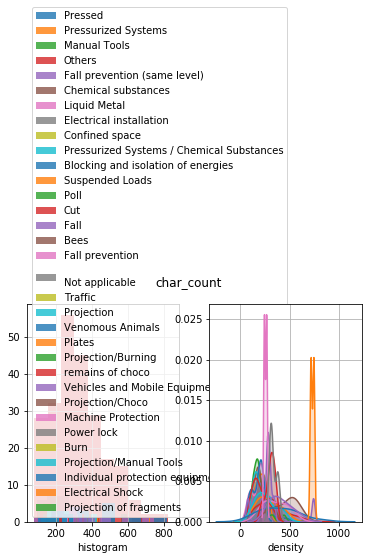

In [203]:
x, y = "char_count", "Critical Risk"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in accident_safety_clean_data[y].unique():
    sns.distplot(accident_safety_clean_data[accident_safety_clean_data[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(accident_safety_clean_data[accident_safety_clean_data[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(accident_safety_clean_data[y].unique())
ax[1].grid(True)
plt.show()